ARIMA(0, 0, 0) MAE=0.138
ARIMA(0, 0, 1) MAE=0.138
ARIMA(0, 0, 2) MAE=0.138
ARIMA(0, 0, 3) MAE=0.138
ARIMA(0, 0, 4) MAE=0.138
ARIMA(0, 1, 0) MAE=0.377
ARIMA(0, 1, 1) MAE=0.377
ARIMA(0, 1, 2) MAE=0.377
ARIMA(0, 1, 3) MAE=0.377
ARIMA(0, 1, 4) MAE=0.377
ARIMA(0, 2, 0) MAE=0.377
ARIMA(0, 2, 1) MAE=0.377
ARIMA(0, 2, 2) MAE=0.377
ARIMA(0, 2, 3) MAE=0.377
ARIMA(0, 2, 4) MAE=0.377
ARIMA(0, 3, 0) MAE=0.377
ARIMA(0, 3, 1) MAE=0.377
ARIMA(0, 3, 2) MAE=0.377
ARIMA(0, 3, 3) MAE=0.377
ARIMA(0, 3, 4) MAE=0.377
ARIMA(0, 4, 0) MAE=0.377
ARIMA(0, 4, 1) MAE=0.377
ARIMA(0, 4, 2) MAE=0.377
ARIMA(0, 4, 3) MAE=0.377
ARIMA(0, 4, 4) MAE=0.377
ARIMA(1, 0, 0) MAE=0.138
ARIMA(1, 0, 1) MAE=0.138
ARIMA(1, 0, 2) MAE=0.138
ARIMA(1, 0, 3) MAE=0.138
ARIMA(1, 0, 4) MAE=0.138
ARIMA(1, 1, 0) MAE=0.377
ARIMA(1, 1, 1) MAE=0.377
ARIMA(1, 1, 2) MAE=0.377
ARIMA(1, 1, 3) MAE=0.377
ARIMA(1, 1, 4) MAE=0.377
ARIMA(1, 2, 0) MAE=0.377
ARIMA(1, 2, 1) MAE=0.377
ARIMA(1, 2, 2) MAE=0.377
ARIMA(1, 2, 3) MAE=0.377
ARIMA(1, 2, 4) MAE=0.377


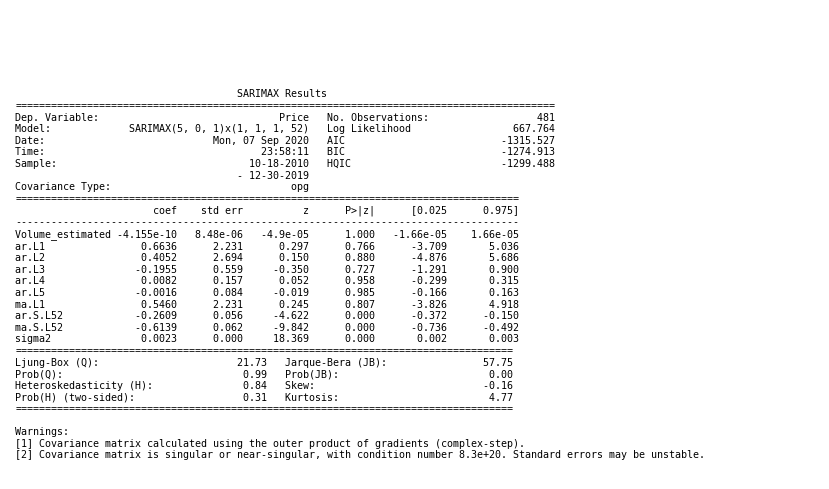

In [3]:
crop_list = [['RASPBERRIES','US','MX','std','SARIMAX','','','USD','KG',None]]

for i in range(0, len(crop_list)):

    crop = crop_list[i]
    import sys
    sys.path.insert(0, '../../src')
    #   https://realpython.com/python-modules-packages/
    sys.path.append('../../src/d01_data')
    sys.path.append('../../src/d02_processing')
    sys.path.append('../../src/d03_modelling')

    import extractions as extract
    import transformations as transf
    import training as train
    import import_data as imp
    import inference as inf
    import time  
    from dateutil.relativedelta import relativedelta
    from datetime import date


    ####################  Train ARIMA volume  ####################

    # Training

    startp = time.time()

    crop = crop_list[i][0]
    ctry = crop_list[i][1]
    trade_ctry = crop_list[i][2]
    ctgr = crop_list[i][3]
    mdel = crop_list[i][4]
    regn = crop_list[i][5]
    pkge = crop_list[i][6]
    crcy = crop_list[i][7]
    msre = crop_list[i][8]
    exog = crop_list[i][9]
    start = date.today().strftime('%Y-01-01')
    end = (date.today() + relativedelta(years=1)).strftime('%Y-12-31')

    ################################### Train SARIMA volumes  ##################################  
    #train.train_sarima_model_vols(crop,ctry,trade_ctry,ctgr)

    #################### Inference volumes ####################
    mdel_vols = 'SARIMA'
    df_pred_vols = inf.get_prediction_vols(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel_vols,start,end)
    # not necessary to save volumes predicted in DB
    exog = df_pred_vols[df_pred_vols.Date_ref > date.today().strftime('%Y-01-01')].drop(columns=['Volume']).set_index('Date_ref')

    #################################### Train SARIMAX model  ###################################
    train.train_sarimax_model(crop,ctry,trade_ctry,ctgr,exog)

    #################### Inference SARIMAX price (including SARIMA volumes)  ####################
    df_pred = inf.get_prediction(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel,exog,start,end)
    inf.load_predictions_db(df_pred,ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel)

    endp = time.time()
    duration = endp - startp
    minutes = duration // 60
    seconds = duration - (minutes * 60)
    print(f"{minutes} minutes and {seconds} seconds")